In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Tesla Deaths - Deaths.csv')
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,-,-,1,...,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN,NaN,NaN,NaN,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,-,-,...,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN,NaN,NaN,NaN,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN


In [7]:
col_names = list(df.columns)
col_names

['Case #',
 'Year',
 'Date',
 ' Country ',
 ' State ',
 ' Description ',
 ' Deaths ',
 ' Tesla driver ',
 ' Tesla occupant ',
 ' Other vehicle ',
 ' Cyclists/ Peds ',
 ' TSLA+cycl / peds ',
 ' Model ',
 ' Autopilot claimed ',
 ' Verified Tesla Autopilot Deaths ',
 ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
 'Unnamed: 16',
 'Unnamed: 17',
 ' Source ',
 ' Note ',
 ' Deceased 1 ',
 ' Deceased 2 ',
 ' Deceased 3 ',
 ' Deceased 4 ']

In [12]:
col_to_drop = df.columns[df.columns.str.contains("Deceased")]
df = df.drop(col_to_drop, axis=1)

In [13]:
df.head()
df[]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,-,-,1,-,-,-,-,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,-,-,-,1,-,-,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN


In [23]:
df[[" Deaths ", "Year"]].head()

,Deaths,Year
0,1.0,2022.0
1,1.0,2022.0
2,1.0,2022.0
3,1.0,2022.0
4,1.0,2022.0


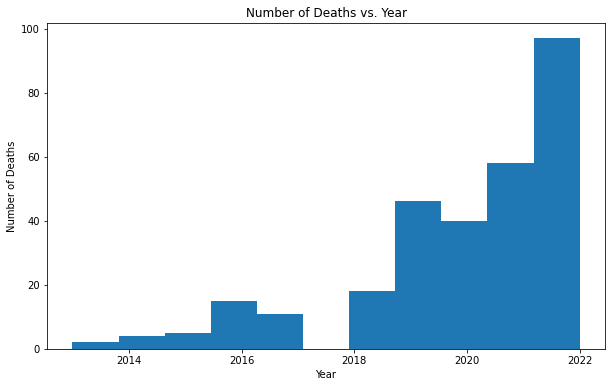

In [24]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=len(df['Year'].unique()))  
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths vs. Year')
plt.show()

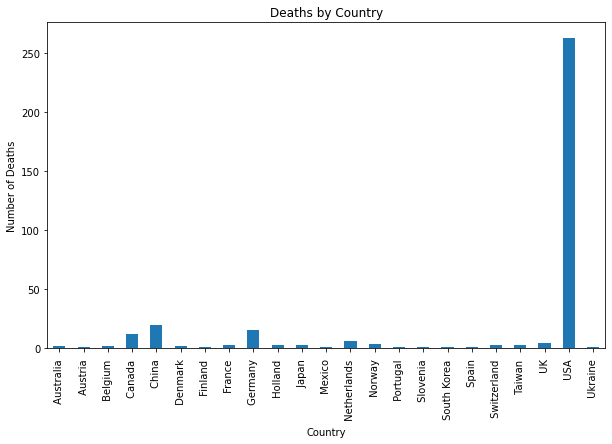

In [26]:

df.groupby(' Country ')[" Deaths "].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Deaths by Country')
plt.show()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,-,-,1,-,-,-,-,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,-,-,-,1,-,-,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN
5,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,-,-,-,-,-,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN
292,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,-,1,-,-,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN
293,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,-,-,-,-,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN
294,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,1,1,-,-,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN


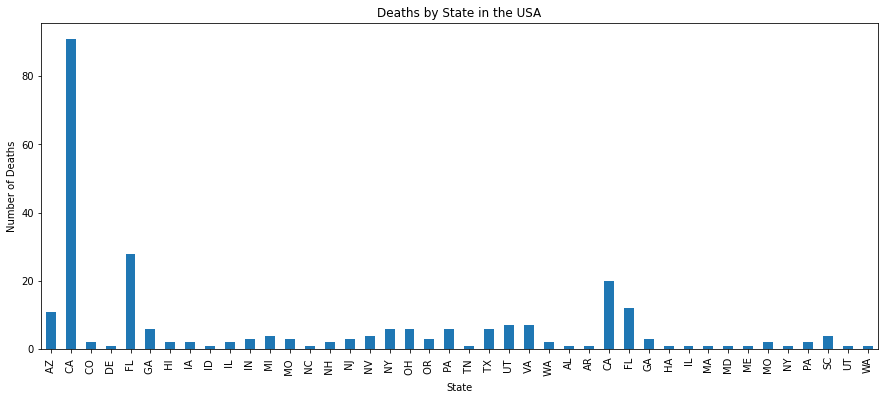

In [32]:
df[df[' Country '] == ' USA '].groupby(" State ")[" Deaths "].sum().plot(kind='bar', figsize=(15, 6))
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.title('Deaths by State in the USA')
# plt.xticks(rotation=45)  
plt.show()

In [38]:
df[" Autopilot claimed "].tail()

304    NaN
305    NaN
306    NaN
307    NaN
308    NaN
Name:  Autopilot claimed , dtype: object

(309, 20)

In [41]:
df2 = pd.read_csv("Tesla Deaths - Sudden Acceleration.csv")
df2.head()

,VIN,Model,Report Date,Incident Date,Location,NHTSA Complaint,Details
0,5YJSA1DN0DF****,2013 MODEL S,12-November-19,22-January-15,"LOS GATOS, CA",11279662,TL THE CONTACT OWNED A 2013 TESLA MODEL S. WHI...
1,5YJXCDE24KF****,2019 MODEL X,6-October-19,2-October-19,"BAKERSFIELD, CA",11266551,WHILE I WAS PARKING SUDDEN UNINTENDED ACCELERA...
2,5YJ3E1EA4KF****,2019 MODEL 3,8-October-19,29-September-19,"WEXFORD, PA",11267131,MY WIFE WAS TRYING TO PARK THE CAR IN OUR GARA...
3,5YJ3E1EA2JF****,2018 MODEL 3,14-October-19,24-September-19,"FREMONT, CA",11268280,HELLO- I WAS TRYING TO PARK MY VEHICLE IN A PA...
4,5YJSA1E28KF****,2019 MODEL S,21-October-19,18-October-19,"GERMANTOWN, TN",11269912,TL THE CONTACT OWNS A 2019 TESLA MODEL S. WHIL...


In [42]:
df2[['City', 'State']] = df2["Location"].str.split(n=1, expand=True)
df2.head()

,VIN,Model,Report Date,Incident Date,Location,NHTSA Complaint,Details,City,State
0,5YJSA1DN0DF****,2013 MODEL S,12-November-19,22-January-15,"LOS GATOS, CA",11279662,TL THE CONTACT OWNED A 2013 TESLA MODEL S. WHI...,LOS,"GATOS, CA"
1,5YJXCDE24KF****,2019 MODEL X,6-October-19,2-October-19,"BAKERSFIELD, CA",11266551,WHILE I WAS PARKING SUDDEN UNINTENDED ACCELERA...,"BAKERSFIELD,",CA
2,5YJ3E1EA4KF****,2019 MODEL 3,8-October-19,29-September-19,"WEXFORD, PA",11267131,MY WIFE WAS TRYING TO PARK THE CAR IN OUR GARA...,"WEXFORD,",PA
3,5YJ3E1EA2JF****,2018 MODEL 3,14-October-19,24-September-19,"FREMONT, CA",11268280,HELLO- I WAS TRYING TO PARK MY VEHICLE IN A PA...,"FREMONT,",CA
4,5YJSA1E28KF****,2019 MODEL S,21-October-19,18-October-19,"GERMANTOWN, TN",11269912,TL THE CONTACT OWNS A 2019 TESLA MODEL S. WHIL...,"GERMANTOWN,",TN
